In [52]:
import pandas as pd
import requests
from matplotlib import pyplot as plt

In [25]:
APPID = ""
URL_BASE = "http://api.openweathermap.org/data/2.5/"

def current_weather(q: str = "Chicago", appid: str = APPID) -> dict:
    """https://openweathermap.org/api"""
    return requests.get(URL_BASE + "weather", params=locals()).json()



# def weather_onecall(lat: float = 55.68, lon: float = 12.57, appid: str = APPID) -> dict:
#     """https://openweathermap.org/api/one-call-api"""
#     return requests.get(URL_BASE + "onecall", params=locals()).json()


if __name__ == "__main__":
#     from pprint import pprint
    location_list = []
    newData = []
    num = int(input('Number of Cities :'))
    for i in range(num):
        given_city = input(f'{i+1} City: ')
        location_list.append(given_city)
    
    for i in range(num):
        data_r = weather_forecast(location_list[i])
        newData.append(data_r['list'][0]['main'])

Number of Cities :3
1 City: Sydney
2 City: Kathmandu
3 City: Pokhara


In [60]:
# Make a DataFrame
df = pd.DataFrame(newData,index=[location_list])
df

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf
Sydney,295.83,292.38,295.10,295.83,1009,1009,1000,67,0.73
Kathmandu,297.02,297.39,296.88,297.02,1012,1012,869,54,0.14
Pokhara,298.30,296.01,298.30,299.94,1013,1013,910,32,-1.64


In [61]:
# change form k to c

df[['temp', 'feels_like', 'temp_min', 'temp_max']] = df[['temp', 'feels_like', 'temp_min', 'temp_max']].apply(lambda x: x- 273.15)
df

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf
Sydney,22.68,19.23,21.95,22.68,1009,1009,1000,67,0.73
Kathmandu,23.87,24.24,23.73,23.87,1012,1012,869,54,0.14
Pokhara,25.15,22.86,25.15,26.79,1013,1013,910,32,-1.64


In [65]:
df.loc['Sydney','temp']

Sydney    22.68
Name: temp, dtype: float64

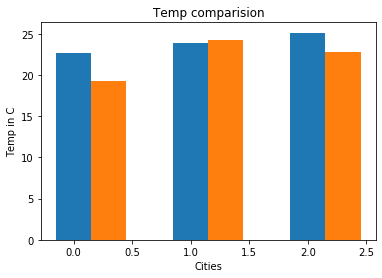

In [122]:
# import numpy as np 
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# Loc = location_list
# Temp = df['temp']
# X = np.arange(4)
# Feels_l = df['feels_like']
# ax.bar(Loc,Temp, width = 0.25)
# ax.bar(Loc,Feels_l, width = 0.50)
# plt.show()


data1 = df['temp']
data2 = df['feels_like']
width =0.3
plt.bar(np.arange(len(data1)), data1, width=width)
plt.bar(np.arange(len(data2))+ width, data2, width=width)

plt.xlabel('Cities')
plt.ylabel('Temp in C')
plt.title('Temp comparision')

plt.show()

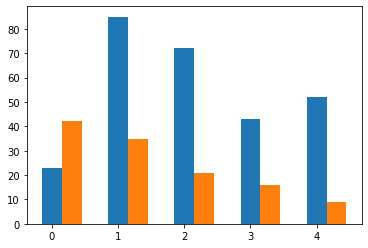

## Forecast

In [48]:
def weather_forecast(q: str = "Kolkata, India", appid: str = APPID) -> dict:
    """https://openweathermap.org/forecast5"""
    return requests.get(URL_BASE + "forecast", params=locals()).json()
location = 'Sydney'
forcast_data = []
data_r = weather_forecast(location)
data_rr =  data_r['list']

for i in range(10):
    forcast_data.append(data_rr[i]['main']) 
    


In [49]:
df = pd.DataFrame(forcast_data)
df

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf
0,295.83,292.38,295.10,295.83,1009,1009,1000,67,0.73
1,294.16,289.97,293.51,294.16,1008,1008,1000,77,0.65
2,293.11,292.51,292.88,293.11,1009,1009,1001,85,0.23
3,292.24,292.07,292.21,292.24,1006,1006,999,89,0.03
4,292.78,292.62,292.78,292.78,1005,1005,997,81,0.00
5,294.37,292.17,294.37,294.37,1006,1006,998,71,0.00
6,296.34,294.06,296.34,296.34,1005,1005,997,64,0.00
7,297.04,294.87,297.04,297.04,1003,1003,996,67,0.00
8,295.76,295.39,295.76,295.76,1002,1002,994,75,0.00
9,294.23,293.66,294.23,294.23,1003,1003,995,80,0.00


In [50]:
# change form k to c

df[['temp', 'feels_like', 'temp_min', 'temp_max']] = df[['temp', 'feels_like', 'temp_min', 'temp_max']].apply(lambda x: x- 273.15)
df

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf
0,22.68,19.23,21.95,22.68,1009,1009,1000,67,0.73
1,21.01,16.82,20.36,21.01,1008,1008,1000,77,0.65
2,19.96,19.36,19.73,19.96,1009,1009,1001,85,0.23
3,19.09,18.92,19.06,19.09,1006,1006,999,89,0.03
4,19.63,19.47,19.63,19.63,1005,1005,997,81,0.00
5,21.22,19.02,21.22,21.22,1006,1006,998,71,0.00
6,23.19,20.91,23.19,23.19,1005,1005,997,64,0.00
7,23.89,21.72,23.89,23.89,1003,1003,996,67,0.00
8,22.61,22.24,22.61,22.61,1002,1002,994,75,0.00
9,21.08,20.51,21.08,21.08,1003,1003,995,80,0.00
